<a href="https://colab.research.google.com/github/ayush-1701/CropYieldPrediction/blob/master/C19_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!unzip /content/drive/MyDrive/COLAB/Datasets/Covid19Detection/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6710.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6711.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6712.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6713.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6714.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6715.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6716.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6717.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6718.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6719.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-672.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6720.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6721.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6722.png  
  inflating:

In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tensorflow.keras.preprocessing import image
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, Conv3D, MaxPooling3D,GlobalAveragePooling3D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf 

In [7]:
DATASET_DIR = '/content/COVID-19_Radiography_Dataset'

In [8]:
os.listdir(DATASET_DIR)

['Lung_Opacity.metadata.xlsx',
 'Lung_Opacity',
 'Normal.metadata.xlsx',
 'Viral Pneumonia.metadata.xlsx',
 'Viral Pneumonia',
 'README.md.txt',
 'Normal',
 'COVID.metadata.xlsx',
 'COVID']

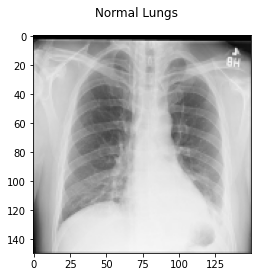

In [34]:
normal_images = []
count = 0 
for img_path in glob.glob(DATASET_DIR + "/Normal/*"):
  count = count +1
  normal_images.append(image.load_img(str(img_path), target_size = (150,150,3)))
  if count >600:
    break
    
fig = plt.figure()
fig.suptitle("Normal Lungs")
plt.imshow(normal_images[0])
plt.show()

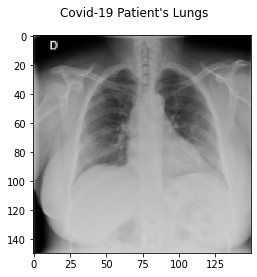

In [26]:
covid_images = []
for img_path in glob.glob(DATASET_DIR + "/COVID/*"): 
    covid_images.append(image.load_img(str(img_path), target_size = (150,150,3)))
    
fig = plt.figure()
fig.suptitle("Covid-19 Patient's Lungs ")
plt.imshow(covid_images[1])
plt.show()

In [35]:
print(str(len(normal_images))+" normal patient images")
print(str(len(covid_images))+" covid patient images")

601 normal patient images
3616 covid patient images


In [36]:
images_together = []

for i in normal_images:
    images_together.append(img_to_array(i))
    
for i in covid_images:
    images_together.append(img_to_array(i))
    
targets = np.zeros(len(images_together))
targets[:len(normal_images)-1]=1


In [37]:
targets = np.array(targets)
print("targets: ",targets.shape)
targets = targets.reshape(-1,1)
print("new shape of targets: ",targets.shape)
images_together = np.array(images_together)
#images_together = images_together.reshape(-1,1)
print(targets)
print(images_together)

targets:  (4217,)
new shape of targets:  (4217, 1)
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
[[[[  1.   1.   1.]
   [  1.   1.   1.]
   [  1.   1.   1.]
   ...
   [  1.   1.   1.]
   [  1.   1.   1.]
   [  1.   1.   1.]]

  [[  1.   1.   1.]
   [  1.   1.   1.]
   [  1.   1.   1.]
   ...
   [  1.   1.   1.]
   [  1.   1.   1.]
   [  1.   1.   1.]]

  [[  8.   8.   8.]
   [  6.   6.   6.]
   [  3.   3.   3.]
   ...
   [  1.   1.   1.]
   [  1.   1.   1.]
   [  1.   1.   1.]]

  ...

  [[ 11.  11.  11.]
   [ 24.  24.  24.]
   [ 54.  54.  54.]
   ...
   [144. 144. 144.]
   [122. 122. 122.]
   [ 92.  92.  92.]]

  [[ 11.  11.  11.]
   [ 23.  23.  23.]
   [ 54.  54.  54.]
   ...
   [143. 143. 143.]
   [122. 122. 122.]
   [ 90.  90.  90.]]

  [[ 10.  10.  10.]
   [ 18.  18.  18.]
   [ 43.  43.  43.]
   ...
   [122. 122. 122.]
   [101. 101. 101.]
   [ 76.  76.  76.]]]


 [[[254. 254. 254.]
   [240. 240. 240.]
   [152. 152. 152.]
   ...
   [ 12.  12.  12.]
   [ 13.  13.  13.]
   [  8.   8.   8

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(images_together, targets, test_size=0.20, stratify=targets)

In [39]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train.reshape(len(X_train),-1), y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
y_pred = svclassifier.predict(X_val.reshape(len(X_val),-1))


In [42]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred, y_val)
print(acc)

0.8852132701421801
